# IMPORTING REQUIRED MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn')

# READING THE DATA

In [2]:
da=pd.read_csv("car data.csv")

In [3]:
da.shape

(301, 9)

In [4]:
da.info

<bound method DataFrame.info of         name  year  selling_Price  present_Price  km_driven fuel_type  \
0       ritz  2014           3.35           5.59      27000    Petrol   
1        sx4  2013           4.75           9.54      43000    Diesel   
2       ciaz  2017           7.25           9.85       6900    Petrol   
3    wagon r  2011           2.85           4.15       5200    Petrol   
4      swift  2014           4.60           6.87      42450    Diesel   
..       ...   ...            ...            ...        ...       ...   
296     city  2016           9.50          11.60      33988    Diesel   
297     brio  2015           4.00           5.90      60000    Petrol   
298     city  2009           3.35          11.00      87934    Petrol   
299     city  2017          11.50          12.50       9000    Diesel   
300     brio  2016           5.30           5.90       5464    Petrol   

    seller_type transmission  owner  
0        Dealer       Manual      0  
1        Dealer

In [5]:
da.isna().sum() #NUll values

name             0
year             0
selling_Price    0
present_Price    0
km_driven        0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
da['Age']=2022-da['year'] #adding age column 
da.drop('year',axis=1,inplace=True) #dropping year column

In [7]:
da.columns #getting columns including age

Index(['name', 'selling_Price', 'present_Price', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner', 'Age'],
      dtype='object')

In [8]:
clm=['fuel_type','seller_type','transmission','owner']

# DATA VISUALIZATION

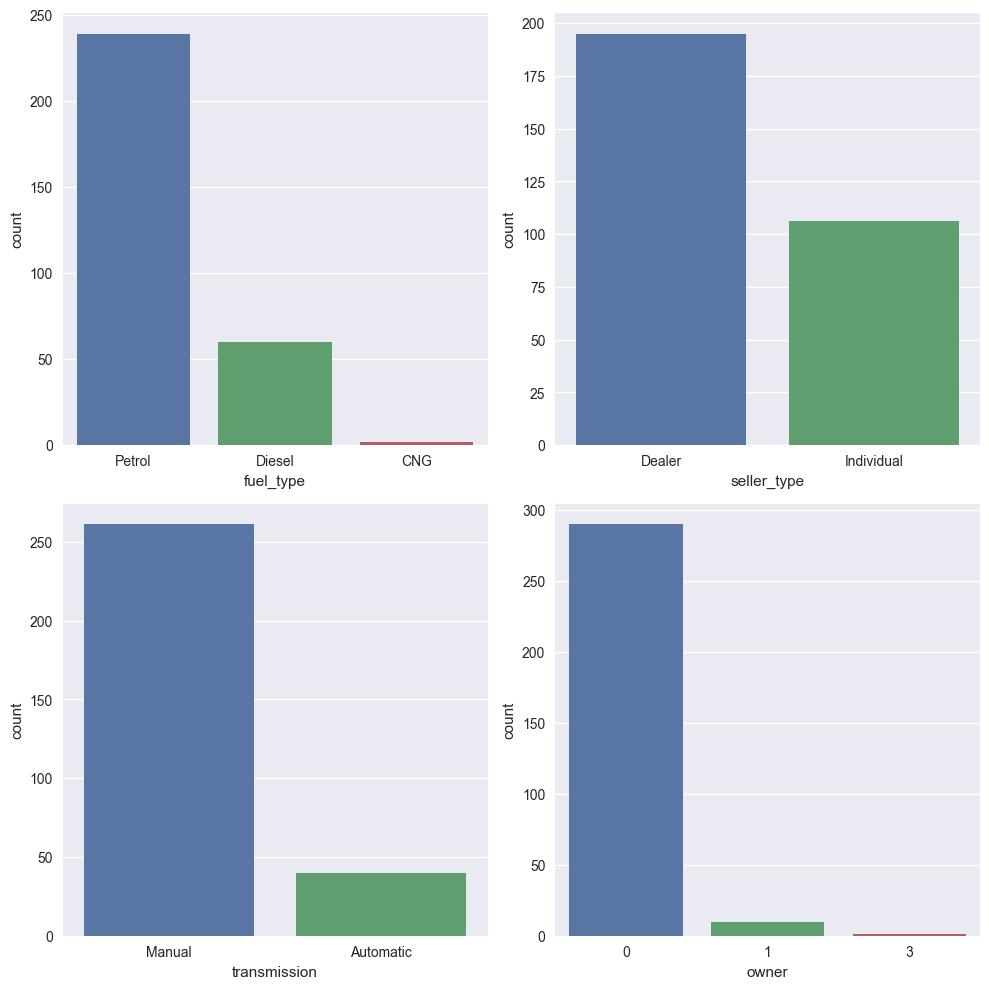

In [9]:
plt.figure(figsize=(10,10))
for i in range(len(clm)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=clm[i], data=da)
plt.tight_layout()

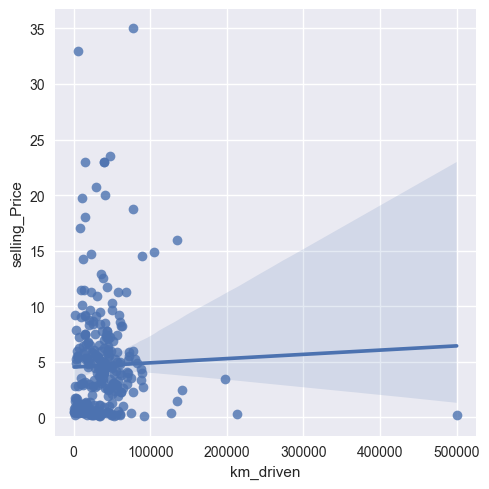

In [10]:
#Comparing the selling price with no of km's driven
sns.lmplot(x='km_driven',y='selling_Price',data=da)  

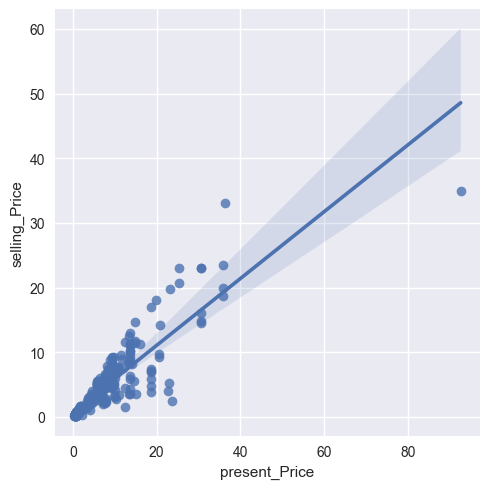

In [11]:
#Comparing the selling price with present price of the car
sns.lmplot(x='present_Price',y='selling_Price',data=da)

Text(0.5, 1.0, 'WIthout dummis')

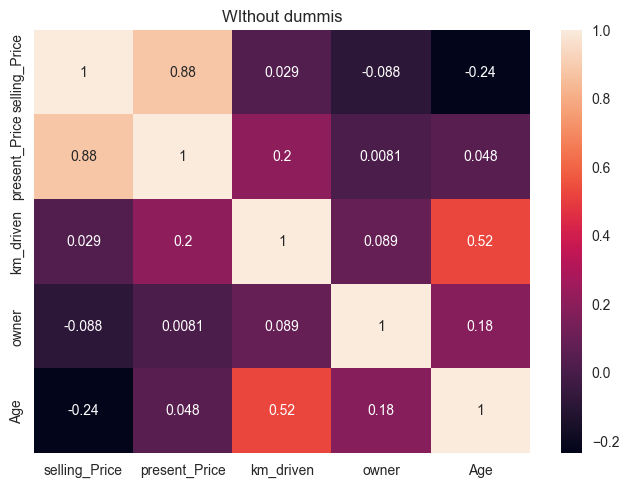

In [12]:
#heat map of the present data
sns.heatmap(da.corr(),annot=True)
plt.title("WIthout dummis") 

In [13]:
#data with age column added
da

,name,selling_Price,present_Price,km_driven,fuel_type,seller_type,transmission,owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [14]:
da.drop(labels='name',axis= 1, inplace = True) #dropping name column

In [15]:
da=pd.get_dummies(da) #getting dummies

In [16]:
#data with added dummy variables
da

,selling_Price,present_Price,km_driven,owner,Age,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,7,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,13,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,5,0,1,0,1,0,0,1


<AxesSubplot:title={'center':'Correlation with dummies'}>

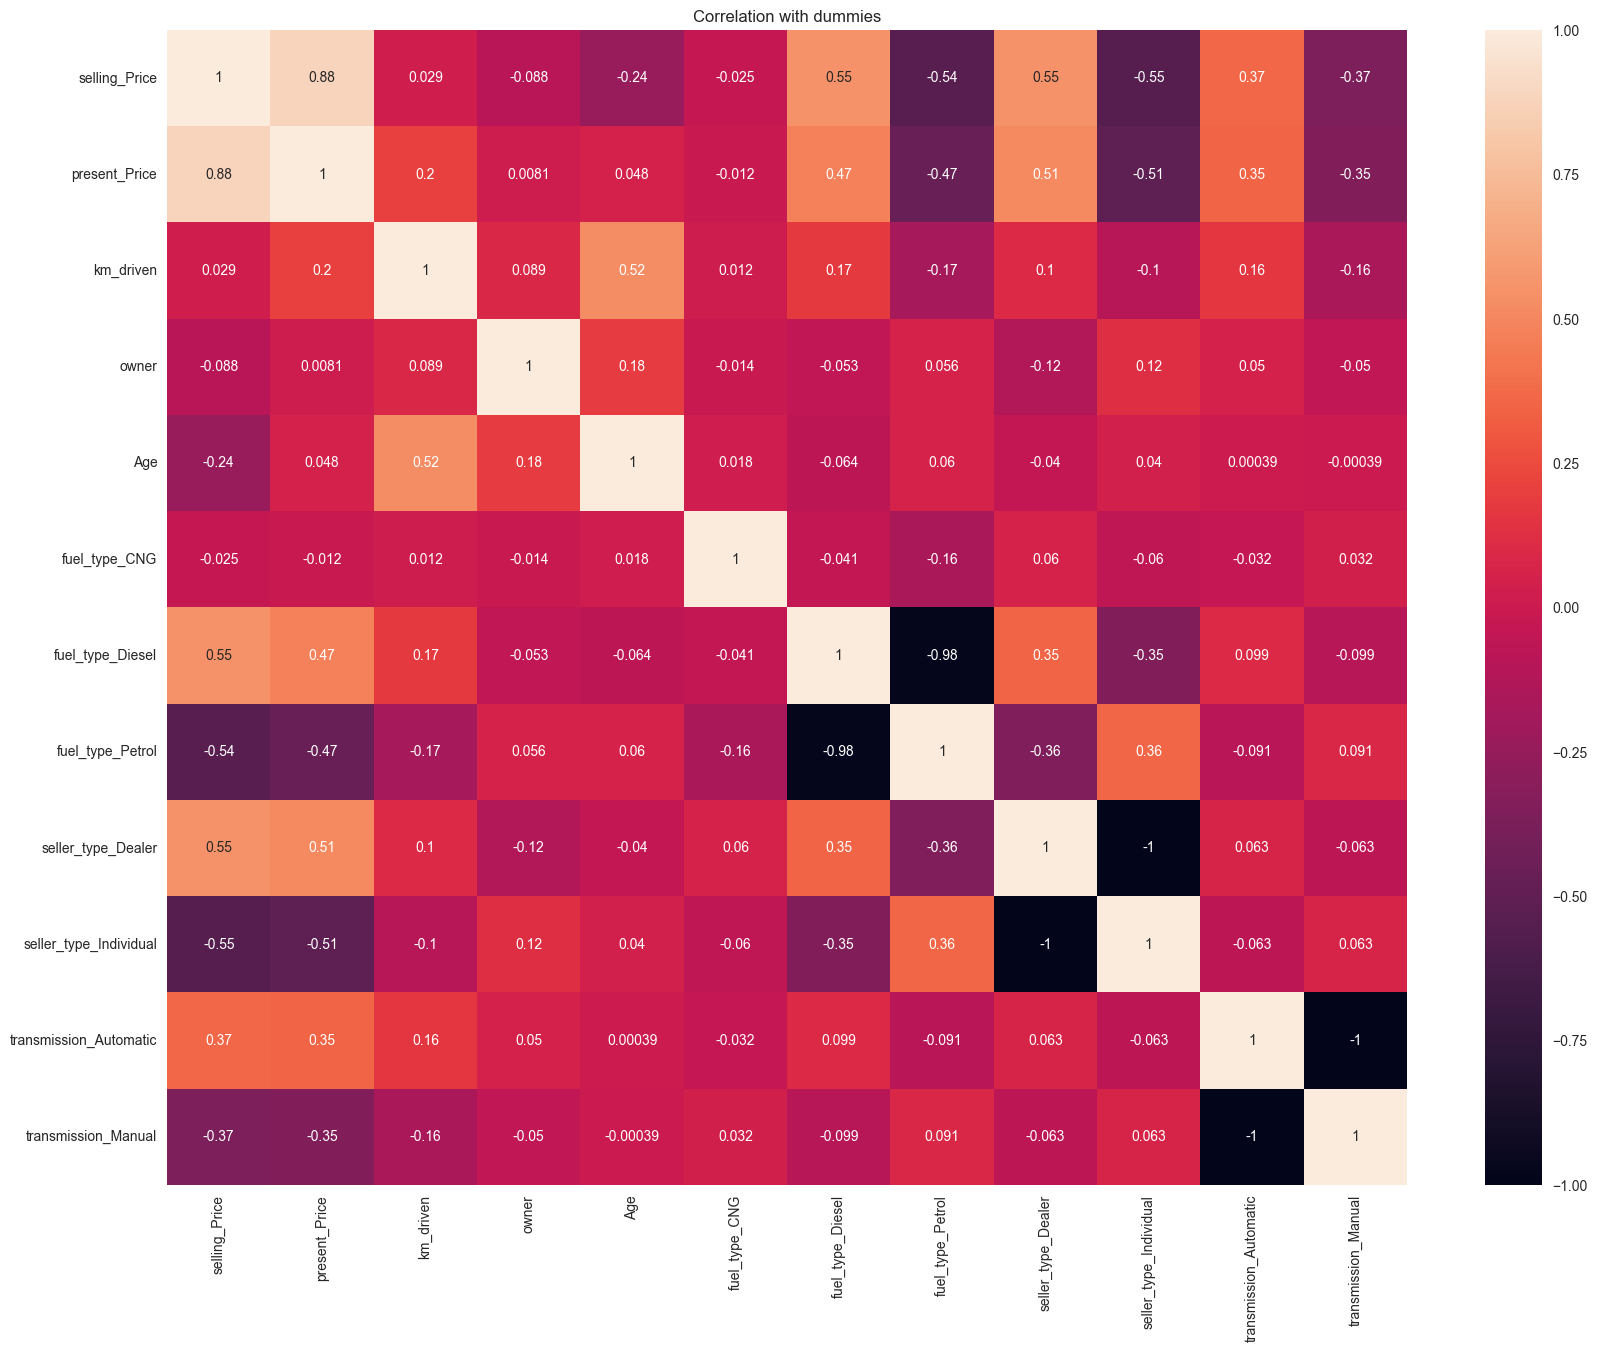

In [17]:
#heat map of the data after adding dummy values
plt.figure(figsize=(20,15))
plt.title("Correlation with dummies")
sns.heatmap(da.corr(),annot=True)

# Splitting the data

In [18]:
#excluding the selling price in the table(comparing the selling price with entire data set attributes)
X=da.drop('selling_Price',axis=1)
Y=da['selling_Price']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
print("X_train: ",X_train.shape)
print("Y_train: ",Y_train.shape)
print("X_test: ",X_test.shape)
print("Y_test: ",Y_test.shape)

X_train:  (240, 11)
Y_train:  (240,)
X_test:  (61, 11)
Y_test:  (61,)


In [20]:
#using minmax scaler(taking the values in b/w 0's and 1's)
Scr=MinMaxScaler()
X_train=Scr.fit_transform(X_train)

In [21]:
X_test=Scr.transform(X_test)

# Appling regression

# Linear Regression

In [22]:
#defining required variables
r2_sc_train=[]
r2_sc_test=[]
#corss validation
crv=[]

mae=[]#mean absolute error
mse=[]#mean square error
rmse=[]#root mean squared error


In [23]:
#Appling linear regression
linear_reg=LinearRegression()
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [24]:
#getting r2 score of train set
Y_pd_tr=linear_reg.predict(X_train)
r2_tr_mod=r2_score(Y_train,Y_pd_tr)
r2_sc_train.append(round(r2_tr_mod,4))

In [25]:
#getting r2 score of test set
Y_pd_te=linear_reg.predict(X_test)
r2_te_mod=r2_score(Y_test,Y_pd_te)
r2_sc_test.append(round(r2_te_mod,4))

In [26]:
#squre mean of train set(cross validation)
cr_v=cross_val_score(linear_reg,X_train,Y_train,cv=5)
crv_mean=cr_v.mean()
crv.append(round(crv_mean,4))

In [27]:
#printing results of r2 scores,cv,metrics
print("r2 score of train set :",round(r2_tr_mod,4))
print("r2 score of test set :",round(r2_te_mod,4))
print("cross validation mean score :",round(crv_mean,4))

r2 score of train set : 0.8887
r2 score of test set : 0.849
cross validation mean score : 0.8499


In [28]:
#regression metrics
mae_reg = metrics.mean_absolute_error(Y_test, Y_pd_te)
mae.append(round(mae_reg,4))
mse_reg = metrics.mean_squared_error(Y_test, Y_pd_te)
mse.append(round(mse_reg,4))
rmse_reg = np.sqrt(metrics.mean_squared_error(Y_test, Y_pd_te))
rmse.append(round(rmse_reg,4))

In [29]:
print('Mean Absolute Error:', round(mae_reg,4))
print('Mean Squared Error:', round(mse_reg,4))
print('Root Mean Squared Error:', round(rmse_reg,4))

Mean Absolute Error: 1.2162
Mean Squared Error: 3.4788
Root Mean Squared Error: 1.8652


c:\users\nagayelamarthi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


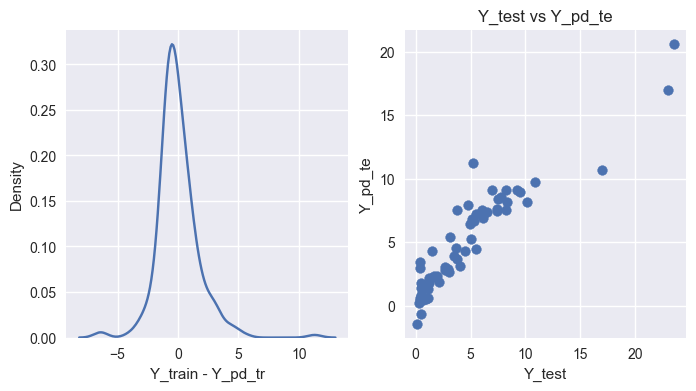

In [31]:
# plotting the trained and tested data
Y_pd_tr=linear_reg.predict(X_train)
Y_pd_te=linear_reg.predict(X_test)
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.distplot((Y_train-Y_pd_tr),hist = False,ax = ax[0])
ax[0].set_xlabel('Y_train - Y_pd_tr')

# Y_test vs Y_train scatter plot
ax[1].set_title('Y_test vs Y_pd_te')
ax[1].scatter(x=Y_test, y=Y_pd_te)
ax[1].set_xlabel('Y_test')
ax[1].set_ylabel('Y_pd_te')
plt.show()
import warnings
warnings.filterwarnings('ignore')

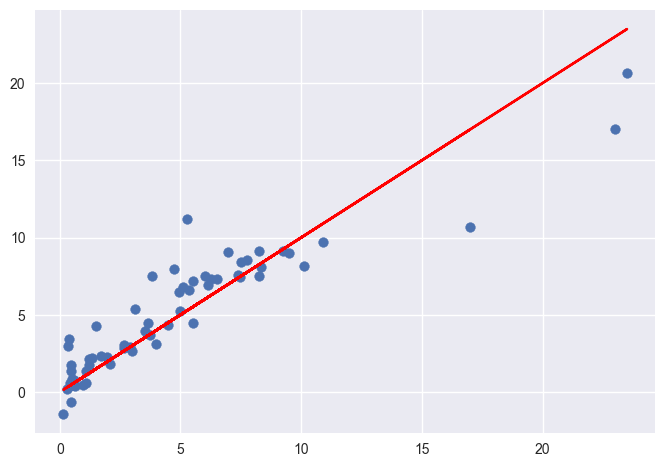

In [207]:
predictions=linear_reg.predict(X_test)
plt.scatter(Y_test,predictions)
plt.plot(Y_test,Y_test,'r')
plt.show()
import warnings
warnings.filterwarnings('ignore')